### Powerlaw distribution

Power laws are probability distributions of the form:
$$ f(x) \propto x^{-\alpha}$$
with $x_0 < x < \infty$, and are characterized by a ''heavy tail'' behavior, meaning that the high values of $x$ still carry a lot of mass of the distriution. In some cases the tails can be so heavy that the variance of the distribution goes to infinity ($\alpha < 3$), or even the expected value itself goes to infinity ($\alpha < 2$). We must have $\alpha>1$ or the pdf does not exist.

$$E(X) \propto \int_{0}^{\infty} x^{-\alpha+1}dx=\left. \frac{x^{-\alpha+2}}{-\alpha+2} \right|_{0}^{\infty}$$

The lower the value of $\alpha$, the heavier the tails of the distribution.

As an example, the following code plots a powerlaw distribution for $0.1 < x < 1$. **It will let you play with the $\alpha$ parameter to see how the tail of the distribution changes**. The red dot corresponds to the expected value of $X$. Note what happens when you decrease below $\alpha=2$.

<function __main__.pl>

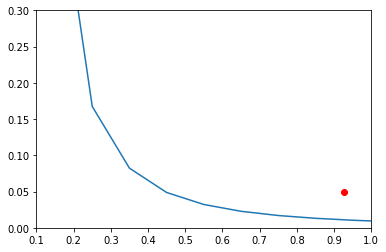

In [12]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
from IPython.html.widgets import interact
def pl(a):
    x0=0.1
    dx=0.1
    X=np.arange(x0+0.5*dx,10000,dx)
    N=-x0**(1-a)/(1-a)
    P=[]
    for x in X:
        xi=x-0.5*dx
        xf=x+0.5*dx
        P.append((xf**(-a+1)-xi**(-a+1))/(N*(1-a)))
    P=np.array(P)
    plt.xlim(0.1, 1)
    plt.ylim(0,0.3)
    plt.plot(X,P)
    plt.plot([sum(X*P)],0.05,'ro')
interact(pl,a=(1.1,3))

When plotting the pdf of a powerlaw distribution on a loglog scale, it has a very recognizable form

$$\log f(x) = b-\alpha \log x$$

This is the reason why it is very easy to spot a powerlaw distribution on a loglog scale; it is a straight line with negative slope.

The cdf also is linear in loglog scale, with a negative slope ($\alpha>1$)

$$ \log F(x) = \tilde b -(\alpha-1) \log x$$

### Degree distribution

We must first load the data and use it to create a network using networkx. This way we can use the package to easily calculate the degree of each node.

We do so by implementing the funcion *makeNetworkFromFiles* that returns a graph from files *fedged* and *fnodes*.

In [13]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
import networkx as nx
import pandas as pd
import powerlaw
import networkx as nx
import matplotlib.pyplot as plt
import itertools
colors = itertools.cycle(['r','g','b','c','y','m','k']) 
linestyles = itertools.cycle(['--',':','-.'])
markers = itertools.cycle(['o','s','v'])


## Function that creates degree distribution and plots it

In [14]:
def getDegreeDistribution(G):
  degs = dict(nx.degree(G)).values()
  kav=np.mean(degs);
  print "Average degree = ",kav
  dk=(max(degs)-min(degs))/100.
  #dk=2
  dhist= np.arange(min(degs), max(degs),dk);
  n, bins = np.histogram(degs,dhist, normed="True",density="True")
  Pk=np.array([]);
  k=np.array([]);
  #######Eliminates zeros
  for i in range(len(n)):
     if n[i]>0:
        k = np.append(k,bins[i])
        Pk = np.append(Pk,n[i]*dk)
  #########################        
  #print "k: ",len(k)
  #print "Pk: ",len(Pk)
  return k, Pk       

# Plot the Degree Distribution for 3 networks of different size of the BA model and save also the value of the clustering coefficient Cvec and te shortest path Length Lvec

In [23]:
Nvec=np.array([300,900,1200])
m=4;
kvec=np.array([]);
Pkvec=np.array([]);
Cvec=np.array([]);
Lvec=np.array([]);

Now that we have the vector of degrees, we can use the powerlaw package. First of all we plot the pdf of the degree distribution. Plotting a pdf requires in general the binning of the data, moreover when presenting the pdf using logarithmic axis the bins must have a logarithmic spacing. 

The logarithmic binning is particularly usefull when fitting a powerlaw to the data, since observing the occurrences becomes less and less likely as the variable increases.

To illustrate this point we show the pdf of the degree of the previously chosen data, using linear and logarithmic binnings. Note what happens for large values of the variable in the linear binning.

300
The average clustering coeficient is  0.0710342671308
The average shortest path length is  2.80084726867
Average degree =  7.8933333333333335
900
The average clustering coeficient is  0.037073962529
The average shortest path length is  3.14420714374
Average degree =  7.964444444444444
1200
The average clustering coeficient is  0.0274647333251
The average shortest path length is  3.25861273283
Average degree =  7.973333333333334


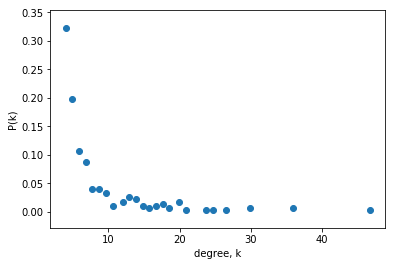

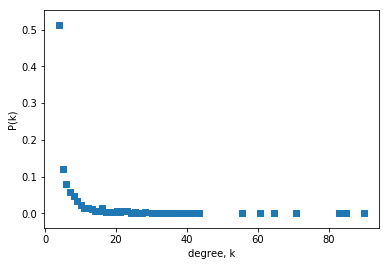

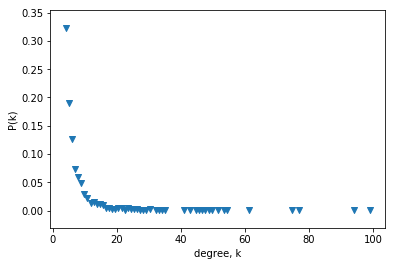

In [24]:
for i in range(len(Nvec)):
    kvec=np.array([]);
    pk=np.array([]);
    k=10.
    p=k/(Nvec[i]-1)
    #print p
    G = nx.barabasi_albert_graph(Nvec[i],m)
    #G = nx.watts_strogatz_graph(Nvec[i],2*m,0.1)
    #G =nx.fast_gnp_random_graph(Nvec[i],p)
    print Nvec[i]
    print "The average clustering coeficient is ",nx.average_clustering(G)
    print "The average shortest path length is ",nx.average_shortest_path_length(G)
    Cvec= np.append(Cvec,nx.average_clustering(G))
    Lvec=np.append(Lvec,nx.average_shortest_path_length(G))
    plt.figure(1+i)
    kvec, Pk =getDegreeDistribution(G)
    degs = dict(nx.degree(G)).values()
    plt.xlabel('degree, k')
    plt.ylabel('P(k)')
    plt.scatter(kvec,Pk,marker=markers.next(),label='N=%d' %Nvec[len(Nvec)-1])
    #print Cvec

In [25]:
Cvec

array([0.07103427, 0.03707396, 0.02746473])

# Plot the Clustering Coefficient

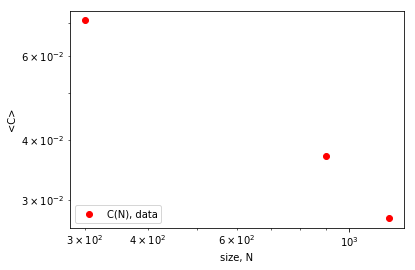

In [26]:
plt.figure(2)
plt.loglog(Nvec,Cvec, 'ro', label='C(N), data')
#plt.loglog(Nvec,np.mean(degs)/Nvec, 'k-',linewidth=2.0, label='<k>/N')
plt.legend(loc='lower left')
plt.xlabel('size, N')
plt.ylabel('<C>')
plt.savefig('ClustCoeff.png')

## Plot Plot the shortest path length

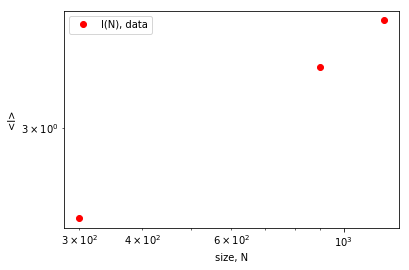

In [27]:
plt.figure(3)
plt.loglog(Nvec,Lvec, 'ro', label='l(N), data')
#plt.loglog(Nvec,np.log(Nvec)/np.log(np.mean(degs)), 'k-',linewidth=2.0, label='log(N)/log(<k>)')
plt.legend(loc='upper left')
plt.xlabel('size, N')
plt.ylabel('<l>')
plt.savefig('ShortestPath.png')

## Comparing Scale-Free and Random Networks

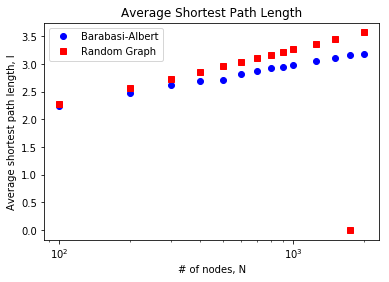

In [28]:
m = 5
bal = np.array([])
randl = np.array([])
Ns3 = (100,200,300,400,500,600,700,800,900,1000,1250,1500,1750,2000)
for i in xrange(len(Ns3)):
    baG = nx.barabasi_albert_graph(Ns3[i],m)
    # Create a random graph with same number of edges as Barabasi-Albert Graph
    randG = nx.gnm_random_graph(Ns3[i],nx.number_of_edges(baG))
    bal = np.append(bal,nx.average_shortest_path_length(baG))
    if nx.is_connected(randG):
        randl = np.append(randl,nx.average_shortest_path_length(randG))
    else:
        randl = np.append(randl,0)

plt.semilogx(Ns3,bal,'bo',label='Barabasi-Albert')
plt.semilogx(Ns3,randl,'rs',label='Random Graph')
plt.title('Average Shortest Path Length')
plt.xlabel('# of nodes, N')
plt.ylabel('Average shortest path length, l')
plt.legend(loc='upper left')

## Path Length to the Rest of the Network

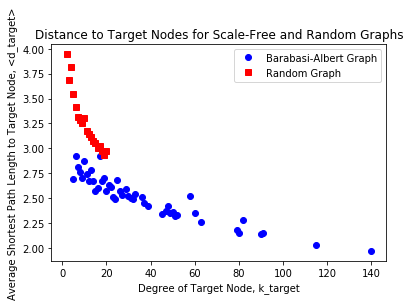

In [20]:
m = 5
baG = nx.barabasi_albert_graph(1000,m)
# Create a random graph with same number of edges as Barabasi-Albert Graph
randG = nx.gnm_random_graph(1000,nx.number_of_edges(baG))

# Create a dictionary of (node degree, average path length to rest of network) pairs
baTargets = {};
for node in nx.nodes(baG):
    degree = nx.degree(baG, nbunch=node)
    if degree not in baTargets.keys():
        total_path_length = 0
        lengths = nx.single_source_shortest_path_length(baG, node)
        average_path_length = sum(lengths.values())/float(len(lengths))
        baTargets[degree] = average_path_length
        
# Do the same for the random graphs
randTargets = {};
for node in nx.nodes(randG):
    degree = nx.degree(randG, nbunch=node)
    if degree not in randTargets.keys():
        total_path_length = 0
        lengths = nx.single_source_shortest_path_length(randG, node)
        average_path_length = sum(lengths.values())/float(len(lengths))
        randTargets[degree] = average_path_length

plt.plot(baTargets.keys(), baTargets.values(), 'bo', label='Barabasi-Albert Graph')
plt.plot(randTargets.keys(), randTargets.values(), 'rs', label='Random Graph')
plt.xlabel('Degree of Target Node, k_target')
plt.ylabel('Average Shortest Path Length to Target Node, <d_target>')
plt.title('Distance to Target Nodes for Scale-Free and Random Graphs')
plt.legend(loc='upper right')
plt.show()